<a href="https://colab.research.google.com/github/abdgazalaa241992-cmyk/lab/blob/main/IUG_Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patterns Evaluation

• Association analysis algorithms have the potential to generate a large number of
patterns.

• For example, a data set containing only six items can produce up to hundreds of
association rules at certain support and confidence thresholds.

• As the size and dimensionality of real commercial databases can be very large, we could
easily end up with thousands or even millions of patterns, many of which might not be
interesting.

• Examples of objective interestingness measures include support, confidence, and
correlation.

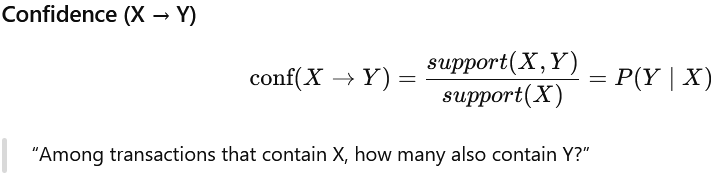

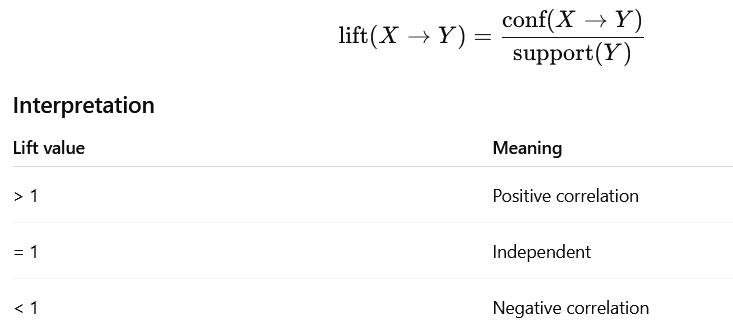

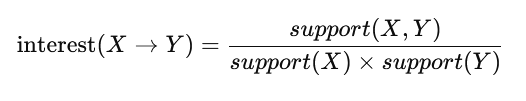

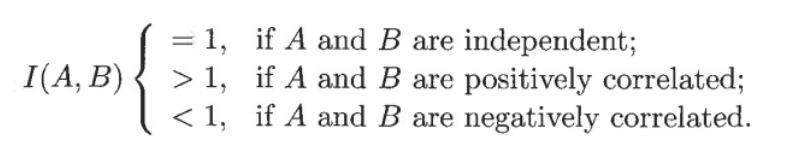

**Contingency table:**

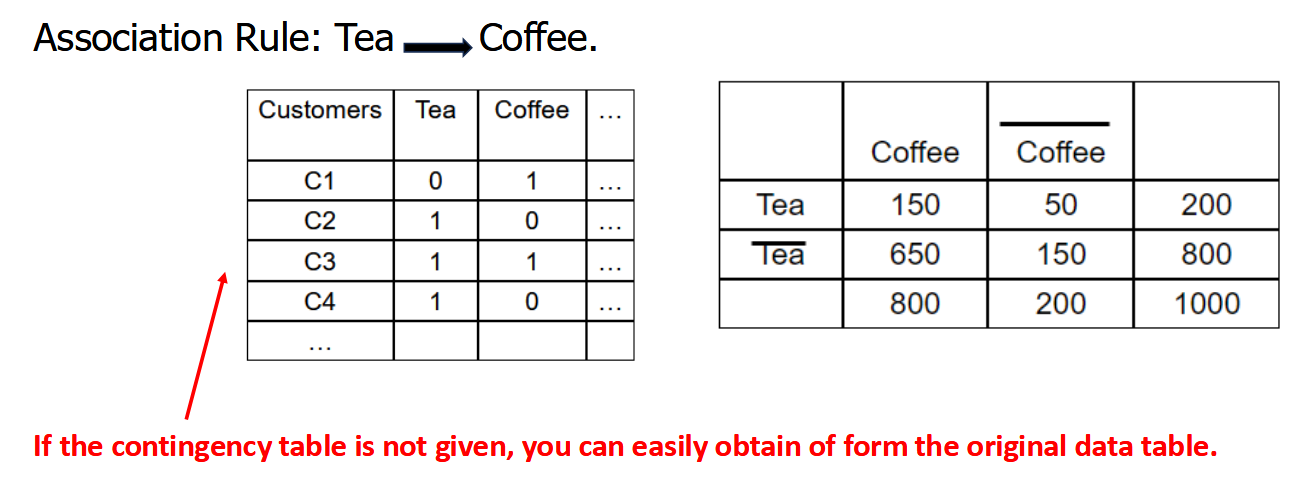

**H-Conf:**

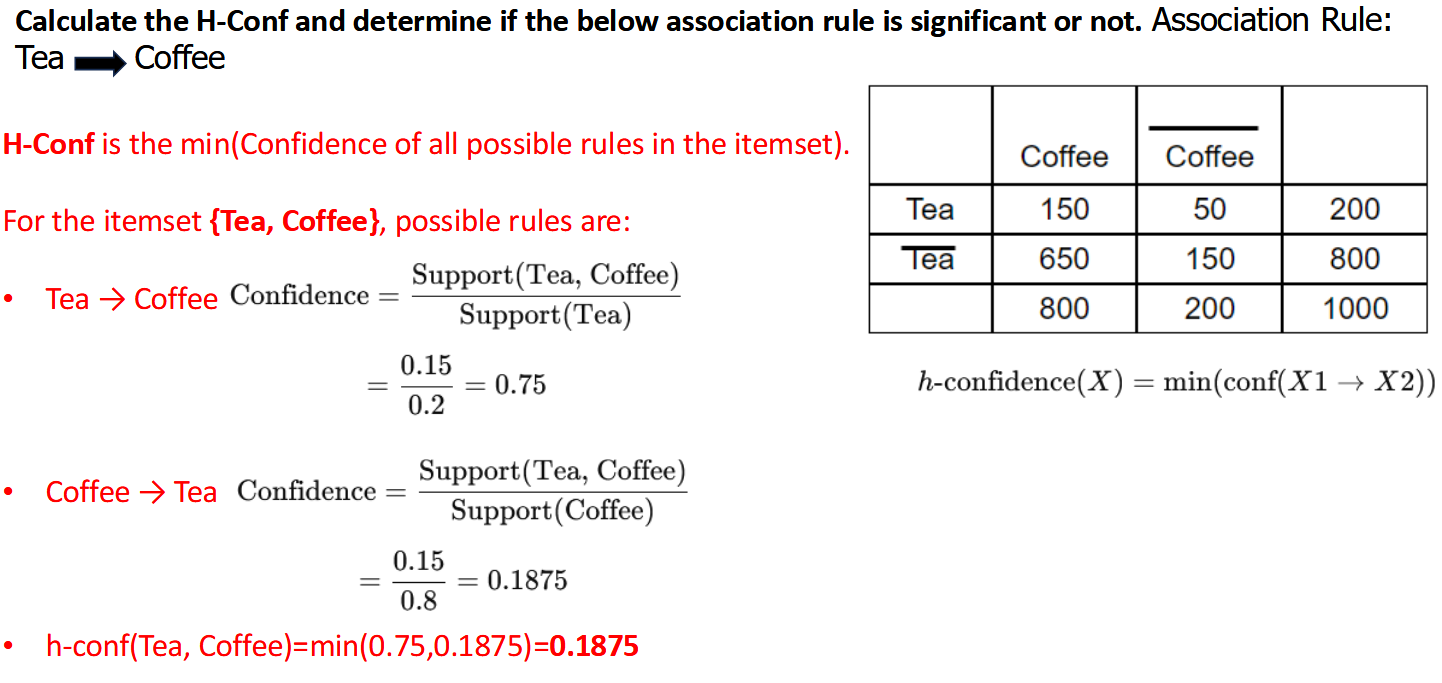

In [ ]:
import pandas as pd

def measures_from_transactions(transactions, X, Y):
    """
    transactions: list of sets, e.g. [{"Bread","Butter"}, {"Bread"}, ...]
    X, Y: item names (strings)
    Returns a dict with:
      - counts
      - support
      - confidence (X->Y, Y->X)
      - lift (X->Y)
      - interest (same as lift via alternative formula)
      - contingency table counts (a,b,c,d)
      - h-confidence
    """
    N = len(transactions)

    def has(item, t):
        return item in t

    # count frequencies
    nX  = sum(has(X, t) for t in transactions)
    nY  = sum(has(Y, t) for t in transactions)
    nXY = sum(has(X, t) and has(Y, t) for t in transactions)

    # Contingency table:
    '''
     a c
     b d
    '''
    # a = #(X and Y)
    # b = #(X and not Y)
    # c = #(not X and Y)
    # d = #(not X and not Y)
    a = nXY
    b = nX - nXY
    c = nY - nXY
    d = N - (a + b + c)

    # Supports
    suppX  = nX / N
    suppY  = nY / N
    suppXY = nXY / N

    # Confidence
    conf_XY = (suppXY / suppX) if suppX > 0 else 0.0 # X -> Y
    conf_YX = (suppXY / suppY) if suppY > 0 else 0.0 # Y -> X

    # Lift / Interest
    lift_XY = (conf_XY / suppY) if suppY > 0 else 0.0
    interest_XY = (suppXY / (suppX * suppY)) if (suppX > 0 and suppY > 0) else 0.0

    # H-confidence
    h_conf = min(conf_XY, conf_YX)

    return {
        "N": N,
        "count_X": nX,
        "count_Y": nY,
        "count_XY": nXY,
        "support_X": suppX,
        "support_Y": suppY,
        "support_XY": suppXY,
        "conf_X->Y": conf_XY,
        "conf_Y->X": conf_YX,
        "lift_X->Y": lift_XY,
        "interest_X->Y": interest_XY,
        "contingency_a(X∧Y)": a,
        "contingency_b(X∧¬Y)": b,
        "contingency_c(¬X∧Y)": c,
        "contingency_d(¬X∧¬Y)": d,
        "h_conf(X,Y)": h_conf,
    }


def print_contingency_table(result, X, Y):
    a = result["contingency_a(X∧Y)"]
    b = result["contingency_b(X∧¬Y)"]
    c = result["contingency_c(¬X∧Y)"]
    d = result["contingency_d(¬X∧¬Y)"]
    N = result["N"]

    table = pd.DataFrame(
        [[a, b, a + b],
         [c, d, c + d],
         [a + c, b + d, N]],
        index=[X, f"¬{X}", "Total"],
        columns=[Y, f"¬{Y}", "Total"]
    )
    return table


# -------------------------
# Example: the simple dataset used earlier
# -------------------------
transactions = [
    {"Bread", "Butter"},  # T1
    {"Bread"},            # T2
    {"Butter"},           # T3
    {"Bread", "Butter"},  # T4
    {"Bread"},            # T5
]

X, Y = "Bread", "Butter"

res = measures_from_transactions(transactions, X, Y)


print("=== Measures ===")
for k, v in res.items():
    if isinstance(v, float):
        print(f"{k:>20}: {v:.4f}")
    else:
        print(f"{k:>20}: {v}")

print("\n=== Contingency Table ===")
print(print_contingency_table(res, X, Y))


=== Measures ===
                   N: 5
             count_X: 4
             count_Y: 3
            count_XY: 2
           support_X: 0.8000
           support_Y: 0.6000
          support_XY: 0.4000
           conf_X->Y: 0.5000
           conf_Y->X: 0.6667
           lift_X->Y: 0.8333
       interest_X->Y: 0.8333
  contingency_a(X∧Y): 2
 contingency_b(X∧¬Y): 2
 contingency_c(¬X∧Y): 1
contingency_d(¬X∧¬Y): 0
         h_conf(X,Y): 0.5000

=== Contingency Table ===
        Butter  ¬Butter  Total
Bread        2        2      4
¬Bread       1        0      1
Total        3        2      5
